#### 2023.03.20 ML 과제

[ 구현1 ]

🔹숫자 이미지 데이터 중 1, 3, 9 숫자 이미지<br>
🔹주성분 추출에 따른 지도학습 분류 학습

In [2]:
from sklearn.datasets import load_digits

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [4]:
data = pd.DataFrame(digits.data)

In [5]:
data['target'] = digits.target

In [6]:
df = data[(data.target == 1)|(data.target == 3)|(data.target == 9)]
df.reset_index(drop=True, inplace=True)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
1,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
2,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
3,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
4,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0,3


In [8]:
data = df.iloc[:, :-1] / 255

In [9]:
target = df.target

In [10]:
from sklearn.decomposition import PCA

In [11]:
for i in range(2, 41):
    pca = PCA(n_components=i, random_state=42)
    pca_data = pca.fit_transform(data)

    print(f'n_components = {i} : {sum(pca.explained_variance_ratio_)}')

n_components = 2 : 0.4076536854934232
n_components = 3 : 0.4973051816652286
n_components = 4 : 0.5688708140111589
n_components = 5 : 0.6214042554597087
n_components = 6 : 0.6631806675316759
n_components = 7 : 0.7011046670744889
n_components = 8 : 0.7354764640310569
n_components = 9 : 0.7660213705719598
n_components = 10 : 0.7920950346085005
n_components = 11 : 0.8164176871800031
n_components = 12 : 0.8359034312603302
n_components = 13 : 0.852905714403612
n_components = 14 : 0.8684352151624107
n_components = 15 : 0.8801890849471654
n_components = 16 : 0.8904831089200624
n_components = 17 : 0.9002065786279505
n_components = 18 : 0.9092754141489315
n_components = 19 : 0.9174827724605289
n_components = 20 : 0.9251421803462171
n_components = 21 : 0.9312004153714449
n_components = 22 : 0.9370597149441334
n_components = 23 : 0.9426228503415782
n_components = 24 : 0.9478515728424076
n_components = 25 : 0.9526593117721276
n_components = 26 : 0.9572222606967726
n_components = 27 : 0.961391126481

In [12]:
pca = PCA(n_components=40, random_state=42)
pca_data = pca.fit_transform(data)

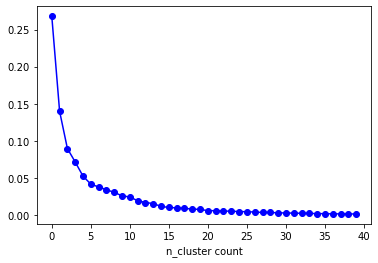

In [28]:
plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.xlabel('n_cluster count')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
X_tr, X_te, y_tr, y_te = train_test_split(data, target, random_state=42, test_size=0.2)

In [16]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((436, 64), (109, 64), (436,), (109,))

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_tr, y_tr)
rfc.score(X_te, y_te)

0.981651376146789

[ 구현2 ]

🔹숫자 이미지 데이터 중 1, 3, 9 숫자 이미지<br>
🔹비지도 학습에 따른 분류

In [18]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.047059,0.050980,0.019608,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.043137,0.062745,0.039216,0.000000,0.0
1,0.0,0.000000,0.027451,0.058824,0.050980,0.003922,0.000000,0.0,0.0,0.031373,...,0.035294,0.0,0.0,0.000000,0.027451,0.050980,0.050980,0.035294,0.000000,0.0
2,0.0,0.000000,0.043137,0.047059,0.000000,0.000000,0.000000,0.0,0.0,0.007843,...,0.015686,0.0,0.0,0.000000,0.035294,0.047059,0.050980,0.011765,0.000000,0.0
3,0.0,0.000000,0.000000,0.000000,0.054902,0.050980,0.003922,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.003922,0.050980,0.062745,0.003922,0.0
4,0.0,0.007843,0.035294,0.058824,0.054902,0.035294,0.011765,0.0,0.0,0.015686,...,0.023529,0.0,0.0,0.007843,0.047059,0.047059,0.050980,0.043137,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,0.000000,0.019608,0.054902,0.043137,0.031373,0.000000,0.0,0.0,0.015686,...,0.000000,0.0,0.0,0.000000,0.027451,0.058824,0.047059,0.019608,0.000000,0.0
541,0.0,0.000000,0.023529,0.047059,0.047059,0.023529,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.007843,0.043137,0.039216,0.015686,0.000000,0.0
542,0.0,0.000000,0.015686,0.054902,0.058824,0.023529,0.000000,0.0,0.0,0.019608,...,0.023529,0.0,0.0,0.000000,0.015686,0.050980,0.058824,0.035294,0.000000,0.0
543,0.0,0.000000,0.015686,0.039216,0.050980,0.023529,0.000000,0.0,0.0,0.003922,...,0.015686,0.0,0.0,0.000000,0.007843,0.054902,0.058824,0.035294,0.000000,0.0


1. inertial 속성값으로 k 판단

In [19]:
from sklearn.cluster import KMeans

In [20]:
arr_inertial = []

for n in range(1, 11):
    model = KMeans(n_clusters=n, random_state=42, n_init='auto')
    model.fit(data)

    arr_inertial.append(model.inertia_)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmea

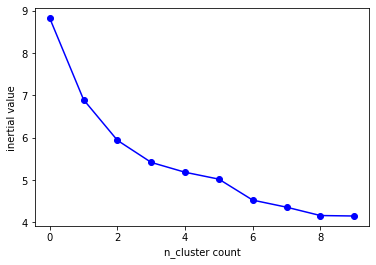

In [21]:
plt.plot(arr_inertial, 'bo-')
plt.xlabel('n_cluster count')
plt.ylabel('inertial value')
plt.show()

2. Dunn Index

In [22]:
from sklearn.metrics import davies_bouldin_score

In [26]:
db_score = []

for n in range(2, 11):
    model = KMeans(n_clusters=n, random_state=42, n_init='auto')
    model.fit(data)

    sc = davies_bouldin_score(data, model.labels_)
    db_score.append(sc)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmea

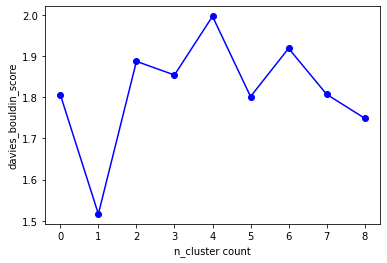

In [27]:
plt.plot(db_score, 'bo-')
plt.xlabel('n_cluster count')
plt.ylabel('davies_bouldin_score')
plt.show()